# Multi terrain probabistic sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Legend:
White -> FLAT<br>
Light grey-> HILLY<br>
Dark grey->FOREST<br>
Black-> BLOCK


In [1]:
# %run a_star_2.ipynb
%run a_star.ipynb
%run agent_9.ipynb
import numpy as np
import random
from matplotlib import cm
import pandas as pd

# Code for Agent 6 goes here

In [2]:
def display2(matrix):
    """
    This function is used to display maze with traversed path(highlighted)
    trajectory_path: path traversed by the agent so far
    matrix: maze of the problem
    """
    temp = matrix.copy()
    colormap = cm.get_cmap("Greys")
    plt.imshow(temp, cmap=colormap)
    plt.show()

In [3]:
def run_agent_9(agent9, maze):
#     print("Agent9 started.\nMaze Size: ",maze_size," Source: ",maze.source," Target: ",maze.target)
    source = maze.source
    target = maze.target
    terrain_matrix = maze.terrain_matrix
    full_grid_world_matrix = maze.full_grid_world_matrix
    agent_gridworld = agent9.agent_gridworld
    valid = []
    
    # counters
    examining_count = 0
    number_of_agent_moves = 0
    number_of_target_moves = 0
    message = ""
    hilly_exam = 0
    flat_exam = 0
    forest_exam = 0

    if source == target:
        target_reached = True
        message = 'found goal'
        print(message)
        return number_of_target_moves, number_of_agent_moves, examining_count, flat_exam, hilly_exam, forest_exam, message
    else:
        target_reached = False

    while not target_reached:
        initialize(maze_size,0.3)
        current_target = agent9.getMaxProbabilityCell(source)
        path = astar(source,current_target, agent9.agent_gridworld_0_1)[0]
#         print(path)
        if(len(path)==0):
            agent9.agent_gridworld_0_1[current_target[0],current_target[1]] = 1
            agent9.update_beliefs_when_xy_blocked(current_target[0], current_target[1], maze_size)
            agent9.agent_gridworld.itemset(current_target,3)
            maze.full_grid_world_matrix[current_target[0],current_target[1]] =1
            maze.terrain_matrix[current_target[0],current_target[1]] = 3
            message = "There is no path to the target, try another grid"
            print(message)
            break

        for i in range(len(path)):


            node = path[i]
            number_of_agent_moves += 1
            print(node)
            
            #remove
            if number_of_agent_moves > 500:
                break

            if full_grid_world_matrix.item(node) == 0:
                terrain_type = terrain_matrix.item(node)
                agent9.agent_gridworld.itemset(node, terrain_type)
                if i == len(path)-1:
                    examining_count += 1
                    if terrain_type == 0:
                        flat_exam += 1
                    elif terrain_type == 1:
                        hilly_exam += 1
                    elif terrain_type == 2:
                        forest_exam += 1
                    if(agent9.examine(node, terrain_type, maze)):
                        message = 'found goal'
                        print(message)
                        target_reached = True
                        break
                    else:
                        #update probabiities when failed to be found and terrain type=terrain_matrix.item(node)
                        current_target, type1, type2 = maze.target_moves(maze_size, node)
                        number_of_target_moves += 1
#                         source = node
                        agent9.update_belief(maze, type1, type2)
                        agent9.update_certainties(maze)
                        source = path[i]
                        break
            elif full_grid_world_matrix.item(node) == 1:
                agent9.agent_gridworld_0_1[node[0],node[1]] = 1
                current_target, type1, type2 = maze.target_moves(maze_size, node)
                number_of_target_moves += 1
                print('node', node, ' is blocked and current_target is ', current_target)
                print("\n")
                agent9.update_beliefs_when_xy_blocked(node[0], node[1], maze_size)
                agent9.update_belief(maze, type1, type2)
                agent9.update_certainties(maze)
                agent9.agent_gridworld.itemset(node,3)
                source = path[i-1]
                break
        source = current_target
    return number_of_target_moves, number_of_agent_moves, examining_count, flat_exam, hilly_exam, forest_exam, message


# Main function

0
Maze size: 10 
Source:  (6, 2) 
Target: (9, 1) 
maze:


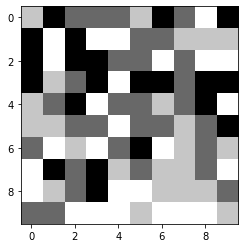

The next target to be visited is (6, 3)
(6, 2)
(7, 2)
(8, 2)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(8, 9)
(7, 9)
(6, 9)
(5, 9)
node (5, 9)  is blocked and current_target is  (9, 7)


terrain_indices_type2 26
other_type 74
The next target to be visited is (7, 5)
(9, 7)
(9, 8)
(9, 9)
(8, 9)
(7, 9)
(6, 9)
(6, 8)
(7, 8)
(8, 8)
(8, 7)
(7, 7)
(6, 7)
(5, 7)
(5, 8)
(4, 8)
node (4, 8)  is blocked and current_target is  (5, 8)


terrain_indices_type2 30
other_type 70
The next target to be visited is (6, 6)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(9, 9)
(8, 9)
(7, 9)
(9, 7)
(8, 7)
(7, 7)
(6, 7)
(5, 7)
(4, 7)
(3, 7)
(3, 8)
node (3, 8)  is blocked and current_target is  (8, 8)


terrain_indices_type2 23
other_type 77
The next target to be visited is (8, 9)
(8, 8)
(9, 8)
(9, 9)
(8, 9)
terrain_indices_type2 30
other_type 70
The next target to be visited is (6, 8)
(7, 8)
(8, 8)
(9, 8)
(9, 9)
(8, 9)
(7, 9)
(6, 9)
(6, 8)
terrain_indices_type2 23
other_type 77
The next target to be visited i

<ipython-input-1-73673d90c374>:176: RuntimeWarning: invalid value encountered in true_divide
  new_belief /= new_belief.sum()


(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(8, 9)
(7, 9)
(6, 9)
(6, 8)
(7, 8)
(8, 8)
(8, 7)
(7, 7)
(6, 7)
(5, 7)
(4, 7)
(3, 7)
(5, 6)
(6, 6)
(7, 6)
(8, 6)
(8, 5)
(7, 5)
(7, 4)
(6, 4)
(5, 4)
(5, 5)
(4, 5)
(4, 4)
(3, 4)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(1, 6)
(1, 5)
(0, 5)
(0, 4)
(1, 4)
(1, 3)
(2, 3)
node (2, 3)  is blocked and current_target is  (3, 4)


terrain_indices_type2 26
other_type 74
The next target to be visited is (3, 3)
(3, 4)
(4, 4)
(5, 4)
(6, 4)
(7, 4)
(8, 4)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(8, 9)
(7, 9)
(6, 9)
(6, 8)
(7, 8)
(8, 8)
(8, 7)
(7, 7)
(6, 7)
(5, 7)
(4, 7)
(3, 7)
(2, 7)
(2, 8)
(2, 9)
(1, 9)
(1, 8)
(0, 8)
(0, 7)
(1, 7)
(1, 6)
(2, 6)
(1, 5)
(2, 5)
(0, 5)
(0, 4)
(1, 4)
(1, 3)
(0, 3)
(0, 2)
(1, 2)
node (1, 2)  is blocked and current_target is  (1, 3)


terrain_indices_type2 26
other_type 74
The next target to be visited is (1, 2)
There is no path to the target, try another grid
number_of_target

In [4]:
if __name__ == "__main__":
#     columns = ['maze_size', 'number_of_agent_moves', 'number_of_target_moves', 'examining_count', 'flat_exam', \
# 'hilly_exam', 'forest_exam', 'message', 'flat_variance', 'hilly_variance', 'forest_variance']
#     df = pd.DataFrame(columns=columns)

    df = pd.read_csv('agent_9_output.csv')
    for i in range(1):
        print(i)
        #Initialize Maze
        maze = gridworld(10)
        maze_size = maze.maze_size

        # set source and target
        initialize(maze_size,0.3)
    #     print(maze.source,maze.target, maze.full_grid_world_matrix)
        path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
        while(len(path)==0):
            print("finding valid source and target")
            maze.source, maze.target = maze.set_valid_source_target(maze_size)
            initialize(maze_size,0.3)
            path = astar(maze.source, maze.target, maze.full_grid_world_matrix)

        # Initialize Agent 6
        agent9 = agent_9(maze_size)

        #Print all details
        print("Maze size:",maze_size,"\nSource: ",maze.source,"\nTarget:",maze.target,"\nmaze:")
        display2(maze.terrain_matrix)
        
        #runnning Agent 6 on maze
        number_of_target_moves, number_of_agent_moves, examining_count, flat_exam, hilly_exam, forest_exam, message = run_agent_9(agent9, maze)

        print("number_of_target_moves: ", number_of_target_moves)
        print("number_of_agent_moves: ", number_of_agent_moves)    
        print("examining_count: ", examining_count)    
        print("message: ", message)

        if message == 'found goal':
            to_append = [maze_size, number_of_agent_moves, number_of_target_moves, examining_count, \
                         flat_exam, hilly_exam, forest_exam, message]
            df_length = len(df)
            df.loc[df_length] = to_append
            df.iloc[: , 1:].to_csv('agent_9_output.csv')

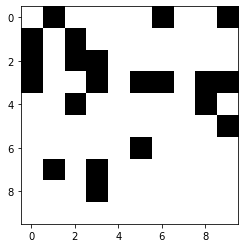

In [5]:
display2(maze.full_grid_world_matrix)

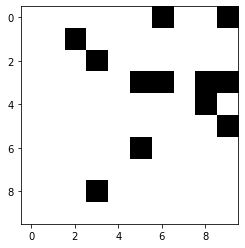

In [6]:
display2(agent9.agent_gridworld_0_1)

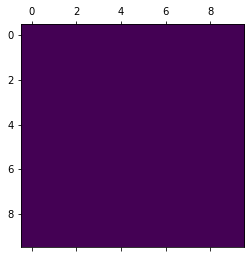

In [7]:
import matplotlib
matplotlib.pyplot.matshow(agent9.certainty_matrix)

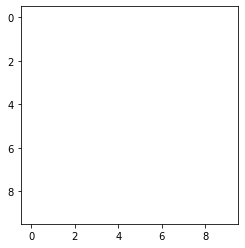

In [8]:
display2(agent9.belief_matrix)

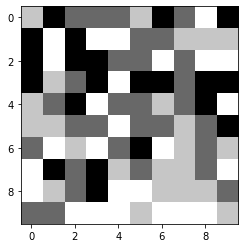

In [9]:
display2(maze.terrain_matrix)

In [10]:
maze.full_grid_world_matrix

matrix([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 1, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])